In [1]:
import gc 
import numpy as np 
import matplotlib.pyplot as plt 
from utils import parallelize

In [2]:
class Experiment: 
    def __init__(self, n = 2, n_trials = 10_000, n_jobs = -1): 
        self.n = n 
        self.n_trials = n_trials
        self.n_jobs = n_jobs 

    def is_invertible(self, matrix: np.array): 
        return not np.allclose(0, np.linalg.det(matrix))
        
    def run(self, n_jobs = -1, n_trials = 10_000):

        @parallelize(n_jobs, n_trials)
        def trial(): 
            result = 0 
            matrix = np.random.randint(0, 2, size = (self.n, self.n))
            if self.is_invertible(matrix): 
                result = 1
            del matrix
            gc.collect() 
            return result 
    
        self.simulation_results = trial()  
        self.percentage = sum(self.simulation_results) / self.n_trials

In [4]:
experiment_results = []
for n in range(1, 21): 
    e = Experiment(n = n, n_trials = 10_000)
    e.run()
    experiment_results.append((n, e.percentage))

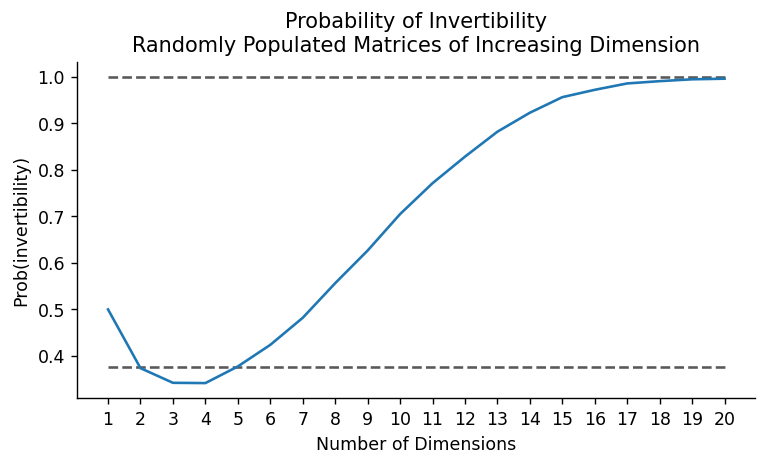

In [6]:
plt.figure(dpi = 125, figsize = (7, 3.5))
ax = plt.subplot(111)

x, y = zip(*experiment_results)

ax.plot(x, 20*[1], "k--", alpha = 0.65)
ax.plot(x, 20*[0.375], "k--", alpha = 0.65)
ax.plot(x, y)
ax.spines[['right', 'top']].set_visible(False)
plt.xticks(np.arange(1, 21, 1.0))
plt.title("Probability of Invertibility\nRandomly Populated Matrices of Increasing Dimension")
plt.xlabel("Number of Dimensions")
plt.ylabel("Prob(invertibility)")

plt.show()